### DIC seasonality for 2090-2100 averaged over the mixed layer depth

In [7]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns
import calendar
import string

In [8]:
import plotly.io as pio
pio.renderers.default='jupyterlab'

In [9]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Times")
sns.set_context(font_scale=0.8)

In [10]:
base_eu_26 = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/DIC/dic_mld/regridded_dic_base_2.6.nc', decode_times=True)
oae_eu_26 = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/DIC/dic_mld/regridded_dic_oae_2.6.nc', decode_times=True)

base_eu_70 = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0/DIC/dic_mld/regridded_dic_base_7.0.nc', decode_times=True)
oae_eu_70 = xr.open_dataset('//Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0/DIC/dic_mld/regridded_dic_oae_7.0.nc', decode_times=True)

base_dp_26 = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/DIC/dic_mld/regridded_dic_base_dp.nc', decode_times=True)
oae_dp_26 = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP1_2.6/DIC/dic_mld/regridded_dic_oae_dp.nc', decode_times=True)

base_dp_70 = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0//DIC/dic_mld/regridded_dic_base_dp.nc', decode_times=True)
oae_dp_70 = xr.open_dataset('/Volumes/UnionSine/Cropped_DataTransfer/SSP3_7.0//DIC/dic_mld/regridded_dic_oae_dp.nc', decode_times=True)

In [11]:
class HandlerEllipse(HandlerPatch):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        center = 0.5 * width - 0.5 * xdescent, 0.5 * height - 0.5 * ydescent
        p = mpatches.Ellipse(xy=center, width=height + xdescent,
                             height=height + ydescent)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)
        return [p]

In [14]:
base_eu_26 = base_eu_26.sel(time_counter=slice('2090','2100'))
oae_eu_26 = oae_eu_26.sel(time_counter=slice('2090','2100'))

month_length_baseline = base_eu_26.time_counter.dt.days_in_month
dic_weighted_eu_26_baseline = ((base_eu_26 * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

month_length_oae = oae_eu_26.time_counter.dt.days_in_month
dic_weighted_eu_26_oae = ((oae_eu_26 * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

dic_baseline_eu_26 = dic_weighted_eu_26_baseline.to_dataframe()
dic_baseline_eu_26['Month'] = pd.DatetimeIndex(dic_baseline_eu_26.index).month

dic_oae_eu_26 = dic_weighted_eu_26_oae.to_dataframe()
dic_oae_eu_26['Month'] = pd.DatetimeIndex(dic_oae_eu_26.index).month

# condition

conditions_month_dic = [
    (dic_baseline_eu_26['Month'] == 1),
    (dic_baseline_eu_26['Month'] == 2),
    (dic_baseline_eu_26['Month'] == 3),
    (dic_baseline_eu_26['Month'] == 4),
    (dic_baseline_eu_26['Month'] == 5),
    (dic_baseline_eu_26['Month'] == 6),
    (dic_baseline_eu_26['Month'] == 7),
    (dic_baseline_eu_26['Month'] == 8),
    (dic_baseline_eu_26['Month'] == 9),
    (dic_baseline_eu_26['Month'] == 10),
    (dic_baseline_eu_26['Month'] == 11),
    (dic_baseline_eu_26['Month'] == 12)
]

values_month_dic = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_baseline_eu_26['Month'] = np.select(conditions_month_dic, values_month_dic)

# condition

dic_oae_eu_26['Month'] = np.select(conditions_month_dic, values_month_dic)

eu_26_baseline_dic = (dic_baseline_eu_26.groupby(dic_baseline_eu_26.index.month).mean()).reset_index()
eu_26_baseline_dic['time_counter'] = eu_26_baseline_dic['time_counter'].apply(lambda x: calendar.month_abbr[x])

eu_26_oae_dic = (dic_oae_eu_26.groupby(dic_oae_eu_26.index.month).mean()).reset_index()
eu_26_oae_dic['time_counter']= eu_26_oae_dic['time_counter'].apply(lambda x: calendar.month_abbr[x])

colors_month_dic = dict(zip(eu_26_baseline_dic.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

delta_dic_eu_26 = (dic_oae_eu_26.DIC - dic_baseline_eu_26.DIC).to_xarray()

delta_dic_eu_26 = delta_dic_eu_26.to_dataframe('dic')
delta_dic_mean_eu_26 = (delta_dic_eu_26.groupby(delta_dic_eu_26.index.month).dic.mean()).reset_index()
delta_dic_mean_eu_26['time_counter'] = delta_dic_mean_eu_26['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [15]:
# dicalinity

base_eu_70 = base_eu_70.sel(time_counter=slice('2090','2100'))
oae_eu_70 = oae_eu_70.sel(time_counter=slice('2090','2100'))

month_length_baseline = base_eu_70.time_counter.dt.days_in_month
dic_weighted_eu_70_baseline = ((base_eu_70 * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

month_length_oae = oae_eu_70.time_counter.dt.days_in_month
dic_weighted_eu_70_oae = ((oae_eu_70 * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

dic_baseline_eu_70 = dic_weighted_eu_70_baseline.to_dataframe()
dic_baseline_eu_70['Month'] = pd.DatetimeIndex(dic_baseline_eu_70.index).month

dic_oae_eu_70 = dic_weighted_eu_70_oae.to_dataframe()
dic_oae_eu_70['Month'] = pd.DatetimeIndex(dic_oae_eu_70.index).month

# condition

conditions_month_dic = [
    (dic_baseline_eu_70['Month'] == 1),
    (dic_baseline_eu_70['Month'] == 2),
    (dic_baseline_eu_70['Month'] == 3),
    (dic_baseline_eu_70['Month'] == 4),
    (dic_baseline_eu_70['Month'] == 5),
    (dic_baseline_eu_70['Month'] == 6),
    (dic_baseline_eu_70['Month'] == 7),
    (dic_baseline_eu_70['Month'] == 8),
    (dic_baseline_eu_70['Month'] == 9),
    (dic_baseline_eu_70['Month'] == 10),
    (dic_baseline_eu_70['Month'] == 11),
    (dic_baseline_eu_70['Month'] == 12)
]

values_month_dic = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_baseline_eu_70['Month'] = np.select(conditions_month_dic, values_month_dic)

# condition

dic_oae_eu_70['Month'] = np.select(conditions_month_dic, values_month_dic)

eu_70_baseline_dic = (dic_baseline_eu_70.groupby(dic_baseline_eu_70.index.month).mean()).reset_index()
eu_70_baseline_dic['time_counter'] = eu_70_baseline_dic['time_counter'].apply(lambda x: calendar.month_abbr[x])

eu_70_oae_dic = (dic_oae_eu_70.groupby(dic_oae_eu_70.index.month).mean()).reset_index()
eu_70_oae_dic['time_counter']= eu_70_oae_dic['time_counter'].apply(lambda x: calendar.month_abbr[x])

colors_month_dic = dict(zip(eu_70_baseline_dic.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

delta_dic_eu_70 = (dic_oae_eu_70.DIC - dic_baseline_eu_70.DIC).to_xarray()

delta_dic_eu_70 = delta_dic_eu_70.to_dataframe('dic')
delta_dic_mean_eu_70 = (delta_dic_eu_70.groupby(delta_dic_eu_70.index.month).dic.mean()).reset_index()
delta_dic_mean_eu_70['time_counter'] = delta_dic_mean_eu_70['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [16]:
# dicalinity

base_dp_26 = base_dp_26.sel(time_counter=slice('2090','2100'))
oae_dp_26 = oae_dp_26.sel(time_counter=slice('2090','2100'))

month_length_baseline = base_dp_26.time_counter.dt.days_in_month
dic_weighted_dp_26_baseline = ((base_dp_26 * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

month_length_oae = oae_dp_26.time_counter.dt.days_in_month
dic_weighted_dp_26_oae = ((oae_dp_26 * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

dic_baseline_dp_26 = dic_weighted_dp_26_baseline.to_dataframe()
dic_baseline_dp_26['Month'] = pd.DatetimeIndex(dic_baseline_dp_26.index).month

dic_oae_dp_26 = dic_weighted_dp_26_oae.to_dataframe()
dic_oae_dp_26['Month'] = pd.DatetimeIndex(dic_oae_dp_26.index).month

# condition

conditions_month_dic = [
    (dic_baseline_dp_26['Month'] == 1),
    (dic_baseline_dp_26['Month'] == 2),
    (dic_baseline_dp_26['Month'] == 3),
    (dic_baseline_dp_26['Month'] == 4),
    (dic_baseline_dp_26['Month'] == 5),
    (dic_baseline_dp_26['Month'] == 6),
    (dic_baseline_dp_26['Month'] == 7),
    (dic_baseline_dp_26['Month'] == 8),
    (dic_baseline_dp_26['Month'] == 9),
    (dic_baseline_dp_26['Month'] == 10),
    (dic_baseline_dp_26['Month'] == 11),
    (dic_baseline_dp_26['Month'] == 12)
]

values_month_dic = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_baseline_dp_26['Month'] = np.select(conditions_month_dic, values_month_dic)

# condition

dic_oae_dp_26['Month'] = np.select(conditions_month_dic, values_month_dic)

dp_26_baseline_dic = (dic_baseline_dp_26.groupby(dic_baseline_dp_26.index.month).mean()).reset_index()
dp_26_baseline_dic['time_counter'] = dp_26_baseline_dic['time_counter'].apply(lambda x: calendar.month_abbr[x])

dp_26_oae_dic = (dic_oae_dp_26.groupby(dic_oae_dp_26.index.month).mean()).reset_index()
dp_26_oae_dic['time_counter']= dp_26_oae_dic['time_counter'].apply(lambda x: calendar.month_abbr[x])

colors_month_dic = dict(zip(dp_26_baseline_dic.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

delta_dic_dp_26 = (dic_oae_dp_26.DIC - dic_baseline_dp_26.DIC).to_xarray()

delta_dic_dp_26 = delta_dic_dp_26.to_dataframe('dic')
delta_dic_mean_dp_26 = (delta_dic_dp_26.groupby(delta_dic_dp_26.index.month).dic.mean()).reset_index()
delta_dic_mean_dp_26['time_counter'] = delta_dic_mean_dp_26['time_counter'].apply(lambda x: calendar.month_abbr[x])

In [17]:
# dicalinity

base_dp_70 = base_dp_70.sel(time_counter=slice('2090','2100'))
oae_dp_70 = oae_dp_70.sel(time_counter=slice('2090','2100'))

month_length_baseline = base_dp_70.time_counter.dt.days_in_month
dic_weighted_dp_70_baseline = ((base_dp_70 * month_length_baseline).resample(time_counter='M').sum() / month_length_baseline.resample(time_counter='M').sum())

month_length_oae = oae_dp_70.time_counter.dt.days_in_month
dic_weighted_dp_70_oae = ((oae_dp_70 * month_length_oae).resample(time_counter='M').sum() / month_length_oae.resample(time_counter='M').sum())

dic_baseline_dp_70 = dic_weighted_dp_70_baseline.to_dataframe()
dic_baseline_dp_70['Month'] = pd.DatetimeIndex(dic_baseline_dp_70.index).month

dic_oae_dp_70 = dic_weighted_dp_70_oae.to_dataframe()
dic_oae_dp_70['Month'] = pd.DatetimeIndex(dic_oae_dp_70.index).month

# condition

conditions_month_dic = [
    (dic_baseline_dp_70['Month'] == 1),
    (dic_baseline_dp_70['Month'] == 2),
    (dic_baseline_dp_70['Month'] == 3),
    (dic_baseline_dp_70['Month'] == 4),
    (dic_baseline_dp_70['Month'] == 5),
    (dic_baseline_dp_70['Month'] == 6),
    (dic_baseline_dp_70['Month'] == 7),
    (dic_baseline_dp_70['Month'] == 8),
    (dic_baseline_dp_70['Month'] == 9),
    (dic_baseline_dp_70['Month'] == 10),
    (dic_baseline_dp_70['Month'] == 11),
    (dic_baseline_dp_70['Month'] == 12)
]

values_month_dic = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

dic_baseline_dp_70['Month'] = np.select(conditions_month_dic, values_month_dic)

# condition

dic_oae_dp_70['Month'] = np.select(conditions_month_dic, values_month_dic)

dp_70_baseline_dic = (dic_baseline_dp_70.groupby(dic_baseline_dp_70.index.month).mean()).reset_index()
dp_70_baseline_dic['time_counter'] = dp_70_baseline_dic['time_counter'].apply(lambda x: calendar.month_abbr[x])

dp_70_oae_dic = (dic_oae_dp_70.groupby(dic_oae_dp_70.index.month).mean()).reset_index()
dp_70_oae_dic['time_counter']= dp_70_oae_dic['time_counter'].apply(lambda x: calendar.month_abbr[x])

colors_month_dic = dict(zip(dp_70_baseline_dic.time_counter.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

delta_dic_dp_70 = (dic_oae_dp_70.DIC - dic_baseline_dp_70.DIC).to_xarray()

delta_dic_dp_70 = delta_dic_dp_70.to_dataframe('dic')
delta_dic_mean_dp_70 = (delta_dic_dp_70.groupby(delta_dic_dp_70.index.month).dic.mean()).reset_index()
delta_dic_mean_dp_70['time_counter'] = delta_dic_mean_dp_70['time_counter'].apply(lambda x: calendar.month_abbr[x])

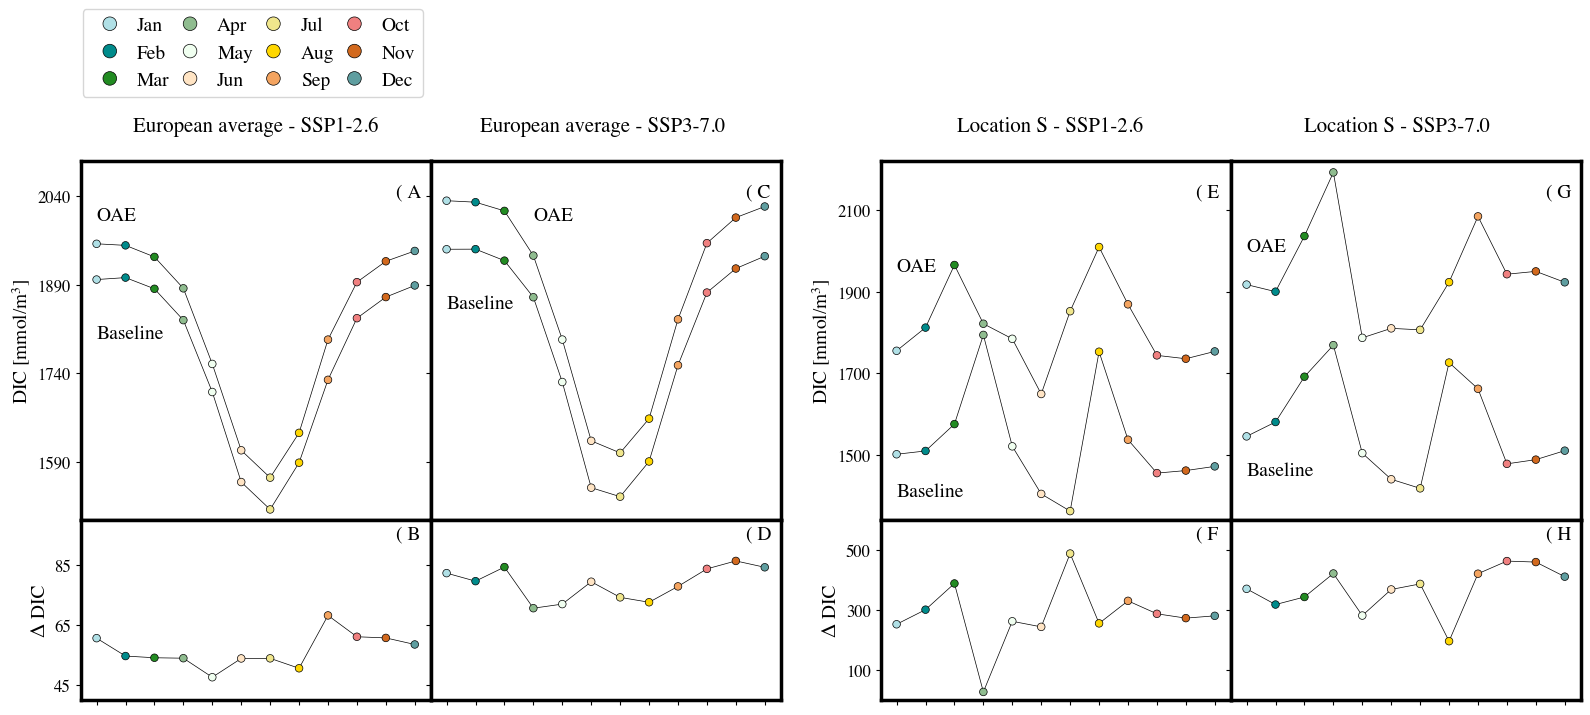

In [77]:
f = plt.figure(figsize=(20, 7)) 
gs_left = f.add_gridspec(nrows=2, ncols=4, height_ratios=[2, 1])
gs_right = f.add_gridspec(nrows=2, ncols=4, height_ratios=[2, 1])

ax1 = plt.subplot(gs_left[0,0])
ax2 = plt.subplot(gs_left[1,0])
ax3 = plt.subplot(gs_left[0,1], sharey = ax1)
ax4 = plt.subplot(gs_left[1,1], sharey = ax2)
ax5 = plt.subplot(gs_right[0,2])
ax6 = plt.subplot(gs_right[1,2])
ax7 = plt.subplot(gs_right[0,3], sharey = ax5)
ax8 = plt.subplot(gs_right[1,3], sharey = ax6)

# now the plots are on top of each other, we'll have to adjust their edges so that they won't overlap
gs_left.update(wspace=0, hspace=0, left=0, right=0.7)
gs_right.update(wspace=0, hspace=0, left=0.05, right=0.75)

ax1.plot(eu_26_baseline_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax1.scatter(eu_26_baseline_dic.time_counter, eu_26_baseline_dic.DIC, color=eu_26_baseline_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

ax1.plot(eu_26_oae_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax1.scatter(eu_26_oae_dic.time_counter, eu_26_oae_dic.DIC, color=eu_26_oae_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)
ax1.tick_params(axis='y', which='major', labelsize=12)

ax2.plot(delta_dic_mean_eu_26.dic, '-', color="black", linewidth=0.5, zorder=1)
ax2.scatter(delta_dic_mean_eu_26.time_counter, delta_dic_mean_eu_26.dic, color=delta_dic_mean_eu_26.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

ax3.plot(eu_70_baseline_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax3.scatter(eu_26_baseline_dic.time_counter, eu_70_baseline_dic.DIC, color=eu_70_baseline_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

ax3.plot(eu_70_oae_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax3.scatter(eu_70_oae_dic.time_counter, eu_70_oae_dic.DIC, color=eu_70_oae_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)
ax3.tick_params(axis='y', which='major', labelsize=12)

ax4.plot(delta_dic_mean_eu_70.dic, '-', color="black", linewidth=0.5, zorder=1)
ax4.scatter(delta_dic_mean_eu_70.time_counter, delta_dic_mean_eu_70.dic, color=delta_dic_mean_eu_70.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

ax5.plot(dp_26_baseline_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax5.scatter(dp_26_baseline_dic.time_counter, dp_26_baseline_dic.DIC, color=dp_26_baseline_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

ax5.plot(dp_26_oae_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax5.scatter(dp_26_oae_dic.time_counter, dp_26_oae_dic.DIC, color=dp_26_oae_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)
ax5.tick_params(axis='y', which='major', labelsize=12)

ax6.plot(delta_dic_mean_dp_26.dic, '-', color="black", linewidth=0.5, zorder=1)
ax6.scatter(delta_dic_mean_dp_26.time_counter, delta_dic_mean_dp_26.dic, color=delta_dic_mean_dp_70.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

ax7.plot(dp_70_baseline_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax7.scatter(dp_70_baseline_dic.time_counter, dp_70_baseline_dic.DIC, color=dp_70_baseline_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

ax7.plot(dp_70_oae_dic.DIC, '-', color="black", linewidth=0.5, zorder=1)
ax7.scatter(dp_70_oae_dic.time_counter, dp_70_oae_dic.DIC, color=dp_70_oae_dic.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)
ax7.tick_params(axis='y', which='major', labelsize=12)

ax8.plot(delta_dic_mean_dp_70.dic, '-', color="black", linewidth=0.5, zorder=1)
ax8.scatter(delta_dic_mean_dp_70.time_counter, delta_dic_mean_dp_70.dic, color=delta_dic_mean_dp_26.time_counter.map(lambda x: colors_month_dic[x]), edgecolors='black',  linewidth=0.5, s=30)

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for ax in axes:
    ax.xaxis.set_tick_params(labelbottom=False)
    ax.tick_params(axis='y', which='major', labelsize=12)
for n, ax in enumerate(axes):
    ax.text(0.9, 0.9, string.punctuation[7] + ' ' + string.ascii_uppercase[n], transform=ax.transAxes, 
            size=14, weight='bold', color='black')

ax1.set_ylabel('DIC [mmol/$\mathregular{m^3}$]', fontsize=14)
ax2.set_ylabel('Δ DIC', fontsize=14)
ax5.set_ylabel('DIC [mmol/$\mathregular{m^3}$]', fontsize=14)
ax6.set_ylabel('Δ DIC', fontsize=14)

ax1.text(0, 1800, s='Baseline', fontsize=14)
ax1.text(0, 2000, s='OAE', fontsize=14)
ax3.text(0, 1850, s='Baseline', fontsize=14)
ax3.text(3, 2000, s='OAE', fontsize=14)
ax5.text(0, 1400, s='Baseline', fontsize=14)
ax5.text(0, 1950, s='OAE', fontsize=14)
ax7.text(0, 1450, s='Baseline', fontsize=14)
ax7.text(0, 2000, s='OAE', fontsize=14)

start, end = ax1.set_ylim(1490, 2100)
ax1.yaxis.set_ticks(np.arange(start+100, end, 150))
start2, end2 = ax2.set_ylim(40, 100)
ax2.yaxis.set_ticks(np.arange(start2+5, end2, 20))
start5, end5 = ax5.set_ylim(1340, 2220)
ax5.yaxis.set_ticks(np.arange(start5+160, end5, 200))
start6, end6 = ax6.set_ylim(0, 600)
ax6.yaxis.set_ticks(np.arange(start6+100, end6, 200))

axtick = [ax3, ax4, ax7, ax8]
for ax in axtick:
    ax.yaxis.set_tick_params(labelleft=False)
    
ax.text(-38.5,1900, 'European average - SSP1-2.6')
ax.text(-26.5,1900, 'European average - SSP3-7.0')
ax.text(-10,1900, 'Location S - SSP1-2.6')
ax.text(2,1900, 'Location S - SSP3-7.0')

legend = [mpatches.Circle((0.5, 0.5), 1, facecolor = value, edgecolor = "black", linewidth=0.5, label = key, alpha = 1) for key, value in colors_month_dic.items()]
ax.legend(handles = legend, bbox_to_anchor=(-2.28,3.9), loc='best', columnspacing=0.05, handletextpad=0.4, fontsize=14, ncol = 4, handler_map={mpatches.Circle: HandlerEllipse()})

plt.savefig('/Users/chiaraciscato/Desktop/geomar/geomarcode/finals/final_figs_mld/dic.png')

### seasonal amplitude divergence from the mean

In [47]:
eu_26_baseline_mean = (eu_26_baseline_dic['dic'] - eu_26_baseline_dic['dic'].mean()).to_xarray()
eu_26_oae_mean =(eu_26_oae_dic['dic'] - eu_26_oae_dic['dic'].mean()).to_xarray()

In [48]:
eu_70_baseline_mean =(eu_70_baseline_dic['dic'] - eu_70_baseline_dic['dic'].mean()).to_xarray()
eu_70_oae_mean =(eu_70_oae_dic['dic'] - eu_70_oae_dic['dic'].mean()).to_xarray()

In [49]:
dp_26_baseline_mean = (dp_26_baseline_dic['dic'] - dp_26_baseline_dic['dic'].mean()).to_xarray()
dp_26_oae_mean =(dp_26_oae_dic['dic'] - dp_26_oae_dic['dic'].mean()).to_xarray()

In [50]:
dp_70_baseline_mean =(dp_70_baseline_dic['dic'] - dp_70_baseline_dic['dic'].mean()).to_xarray()
dp_70_oae_mean =(dp_70_oae_dic['dic'] - dp_70_oae_dic['dic'].mean()).to_xarray()

In [51]:
eu_26_baseline_mean = eu_26_baseline_mean.to_dataframe(name='dic')
eu_26_oae_mean = eu_26_oae_mean.to_dataframe(name='dic')

In [52]:
mean_dic = [
    (eu_26_baseline_mean.index == 0),
    (eu_26_baseline_mean.index == 1),
    (eu_26_baseline_mean.index == 2),
    (eu_26_baseline_mean.index == 3),
    (eu_26_baseline_mean.index == 4),
    (eu_26_baseline_mean.index == 5),
    (eu_26_baseline_mean.index == 6),
    (eu_26_baseline_mean.index == 7),
    (eu_26_baseline_mean.index == 8),
    (eu_26_baseline_mean.index == 9),
    (eu_26_baseline_mean.index == 10),
    (eu_26_baseline_mean.index == 11),
]

values_mean_dic = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

In [53]:
colors_mean = dict(zip(eu_26_baseline_mean.index.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

In [54]:
eu_26_baseline_mean.index = np.select(mean_dic, values_mean_dic)

In [55]:
eu_26_oae_mean.index = np.select(mean_dic, values_mean_dic)

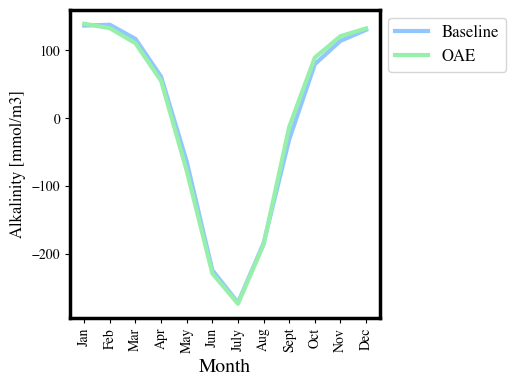

In [56]:
plt.figure(figsize=(4, 4))
plt.plot(eu_26_baseline_mean.index, eu_26_baseline_mean.dic, linewidth=3, label = 'Baseline')
plt.plot(eu_26_oae_mean.index, eu_26_oae_mean.dic, linewidth=3, label = 'OAE')
plt.xlabel("Month", fontsize=14)
plt.ylabel("dicalinity [mmol/m3]", fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc='best', fontsize=12)
plt.tick_params(axis='x', which='major', labelsize=10, rotation=90)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.title('', fontname="Times", fontsize=12, y=1.06)
plt.show()